In [3]:
import pandas as pd

wine_data = pd.read_csv('/content/winequality-red.csv')

In [5]:
print(wine_data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

# Histogram of Grades depending on Quality

--> on the whole dataset

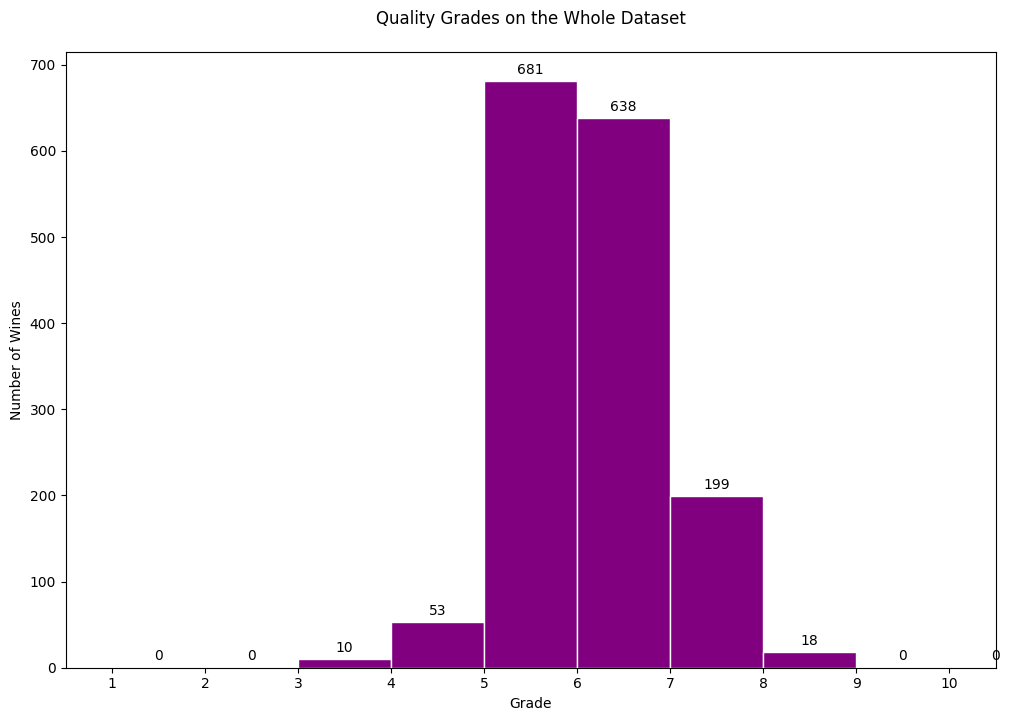

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))
counts, _, patches = plt.hist(wine_data['quality'], bins = range(1, 12), color = 'purple', edgecolor = 'white')

plt.xlim([0.5, 10.5])
plt.xticks(range(1, 11))

plt.title('Quality Grades on the Whole Dataset', pad = 20)
plt.xlabel('Grade')
plt.ylabel('Number of Wines')

for count, patch in zip(counts, patches):
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    plt.text(x, y + 5, f'{int(count)}', ha = 'center', va = 'bottom')

plt.show()

--> on the dataset divided into Train - Test

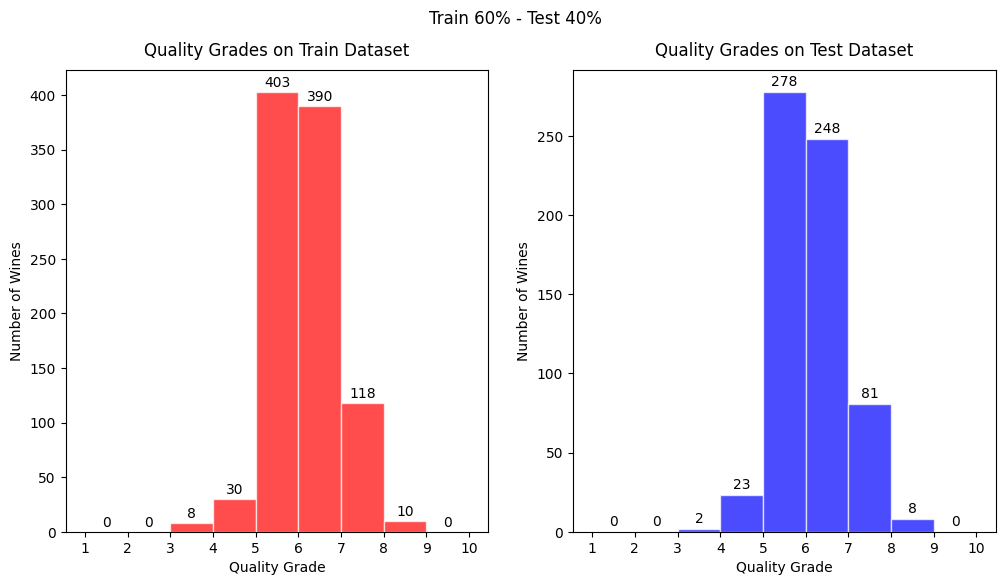

In [9]:
from sklearn.model_selection import train_test_split

X = wine_data.drop(columns = 'quality')
y = wine_data['quality']

test_size = 0.4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 42)

plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
counts_test, _, patches_test = plt.hist(y_train, bins = range(1, 11), alpha = 0.7, color = 'red', edgecolor = 'white')
for count, patch in zip(counts_test, patches_test):
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    plt.text(x, y + 2, f'{int(count)}', ha = 'center', va = 'bottom')

plt.title('Quality Grades on Train Dataset', pad = 10)
plt.xlabel('Quality Grade')
plt.ylabel('Number of Wines')
plt.xticks(range(1, 11))

plt.subplot(1, 2, 2)
counts_train, _, patches_train = plt.hist(y_test, bins = range(1, 11), alpha = 0.7, color = 'blue', edgecolor = 'white')
for count, patch in zip(counts_train, patches_train):
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    plt.text(x, y + 2, f'{int(count)}', ha = 'center', va = 'bottom')

plt.title('Quality Grades on Test Dataset', pad = 10)
plt.xlabel('Quality Grade')
plt.ylabel('Number of Wines')
plt.xticks(range(1, 11))

plt.suptitle(f'Train {int(100 - test_size * 100)}% - Test {int(test_size * 100)}%')
plt.show()

#The Correlation Matrix of the Dataset

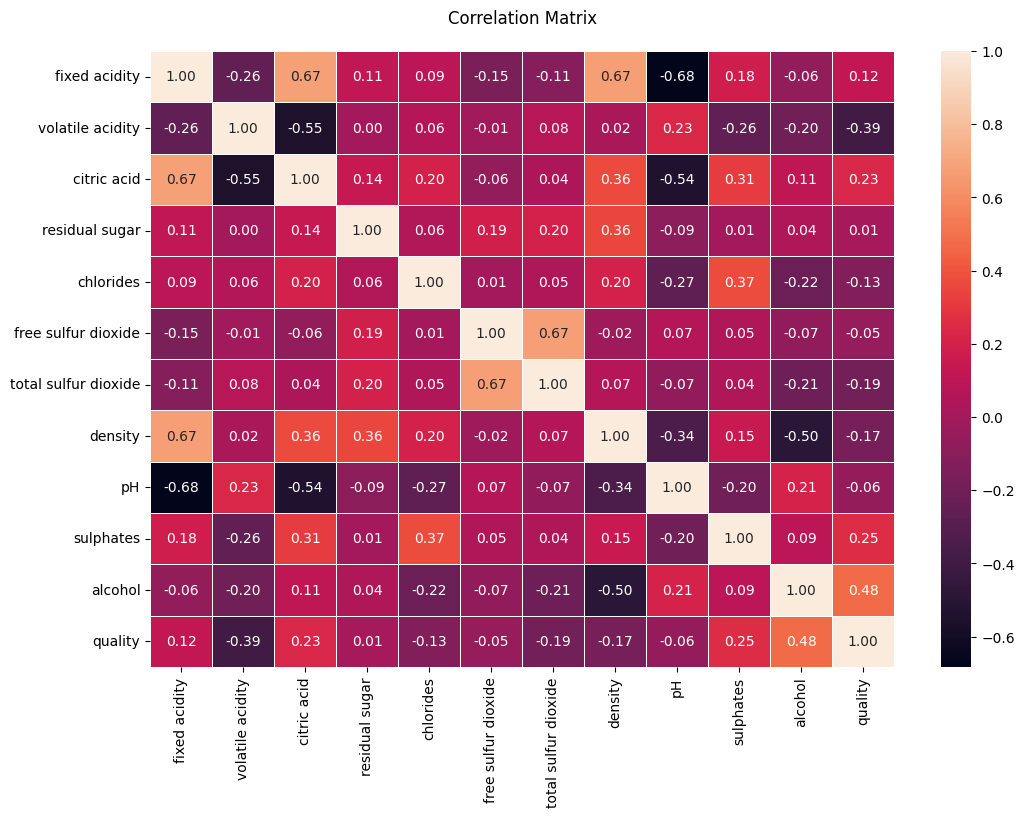

In [10]:
import seaborn as sns

correlation_matrix = wine_data.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(correlation_matrix, annot = True, fmt = '.2f', linewidths = .5)
plt.title('Correlation Matrix', pad = 20)
plt.show()

#2D and 3D representation with PCA

In [12]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = wine_data.drop(['quality'], axis = 1)
y = wine_data['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2', 'PC3'])
pca_df['Quality'] = y

rep2d = px.scatter(pca_df, x = 'PC1', y = 'PC2', color = 'Quality', title = '2 Principal Components Representation')
rep2d.update_layout(title_x = .5)
rep2d.show()

rep3d = px.scatter_3d(pca_df, x = 'PC1', y = 'PC2', z = 'PC3', color = 'Quality', title = '3 Principal Components Representation')
rep3d.update_layout(title_x = .5)
rep3d.show()


#Gaussian Bayes Classifier

In [13]:
import numpy as np

class BayesClassifier:

    def __init__(self):
        self.prior_prob = []
        self.mean_vectors = []
        self.cov_matrices = []
        self.num_pca_comp = 0

    def fit(self, X_train_pca, y_train):
        self.num_pca_comp = X_train_pca.shape[1]
        self.prior_prob = self.calc_prior_prob(y_train)
        self.mean_vectors = self.calc_mean_vectors(X_train_pca, y_train)
        self.cov_matrices = self.calc_cov_matrices(X_train_pca, y_train)

    # prior probabillity --> the proportion of each class in the initial dataset
    def calc_prior_prob(self, y):
        __, class_count = np.unique(y, return_counts = True)
        prior_prob = class_count / len(y)
        return prior_prob

    # the mean of the vectors in each class
    def calc_mean_vectors(self, X, y):
        mean_vectors = []
        labels = np.unique(y)
        for label in labels:
            mean_vectors.append(np.mean(X[y == label], axis = 0))
        return mean_vectors

    # covariance matrix for each class.
    def calc_cov_matrices(self, X, y):
        cov_matrices = []
        labels = np.unique(y)
        for label in labels:
            cov_matrices.append(np.cov(X[y == label], rowvar = False))
        return cov_matrices

    def predict_label(self, X_test):
        y_pred = [] # predicted classes
        labels = [3, 4, 5, 6, 7, 8]
        dict_classes = {i : label for i, label in enumerate(labels)}

        for x in X_test:
            discriminant_values = []
            for i in range(len(self.mean_vectors)):

                mean = np.array(self.mean_vectors[i], dtype = np.float64)
                cov_matrix = np.array(self.cov_matrices[i], dtype = np.float64)
                cov_matrix = np.atleast_2d(cov_matrix)
                cov_matrix = cov_matrix + np.eye(cov_matrix.shape[0]) * 1e-4  # to prevent singular matrix
                prior = self.prior_prob[i]

                # the Mahalanobis distance
                x_minus_mean = np.atleast_2d(x - mean).T
                inv_cov_matrix = np.linalg.inv(cov_matrix)
                discriminant_p1 = -0.5 * np.dot(np.dot(x_minus_mean.T, inv_cov_matrix), x_minus_mean)

                ln_det_cov = np.log(np.linalg.det(cov_matrix))
                ln_prob = np.log(prior)

                discriminant = discriminant_p1 - 0.5 * self.num_pca_comp * np.log(2 * np.pi) - 0.5 * ln_det_cov  + ln_prob
                discriminant_values.append(discriminant)

            decision_class = dict_classes[np.argmax(discriminant_values)] # the one with the highest discriminant
            y_pred.append(decision_class)

        return y_pred


#Comparative Accuracy Analysis for All Classes

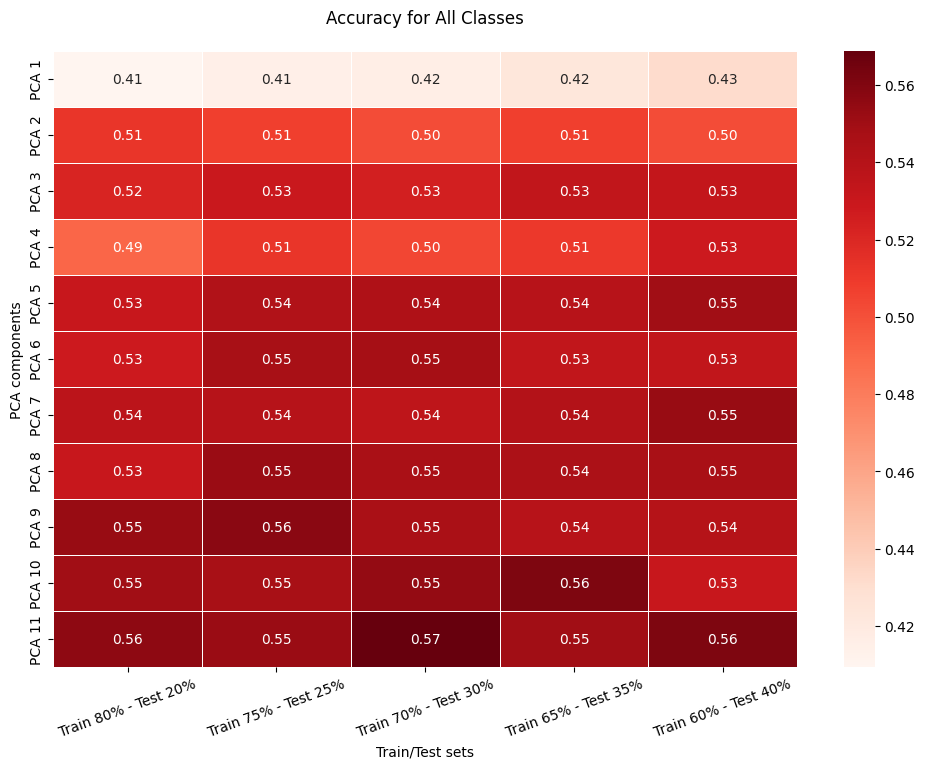

In [14]:
# some possible train-test splits of the dataset in order to achieve the best accuracy
splits = [(0.8, 0.2), (0.75, 0.25), (0.7, 0.3), (0.65, 0.35), (0.6, 0.4)]
results = {}

max_pca_components = min(X.shape[1], X.shape[0])

for train_size, test_size in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    accuracies = []

    for n_components in range(1, max_pca_components + 1):

        # apply PCA on test and train datasets
        pca = PCA(n_components = n_components)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_test_pca = pca.transform(X_test_scaled)

        # train the classifier on the dataset after aplying PCA
        classifier = BayesClassifier()
        classifier.fit(X_train_pca, y_train)

        predictions = classifier.predict_label(X_test_pca)
        accuracy = np.mean(predictions == y_test)
        accuracies.append(accuracy)

    results[f'Train {int(train_size * 100)}% - Test {int(test_size * 100)}%'] = accuracies

df_results = pd.DataFrame.from_dict(results, orient = 'index', columns = [f'PCA {i}' for i in range(1, max_pca_components + 1)])
df_results = df_results.transpose()

plt.figure(figsize = (12, 8))
sns.heatmap(df_results, annot = True, fmt = ".2f", cmap = 'Reds', cbar = True, linewidths = .5, linecolor = 'white')

plt.ylabel('PCA components')
plt.xlabel('Train/Test sets')

plt.xticks(rotation = 20)
plt.title('Accuracy for All Classes', pad = 20)
plt.show()

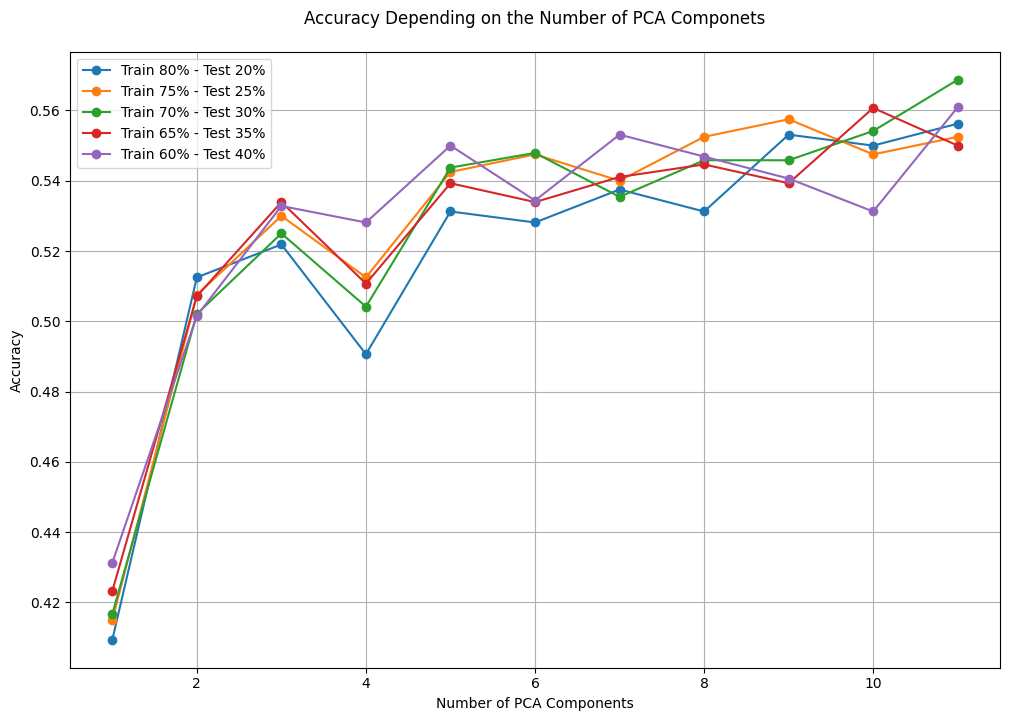

In [16]:
plt.figure(figsize = (12, 8))

for key, value in results.items():
    plt.plot(range(1, max_pca_components + 1), value, marker = 'o', label = key)

plt.title('Accuracy Depending on the Number of PCA Componets', pad = 20)
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#Comparative Accuracy Analysis for Each Class

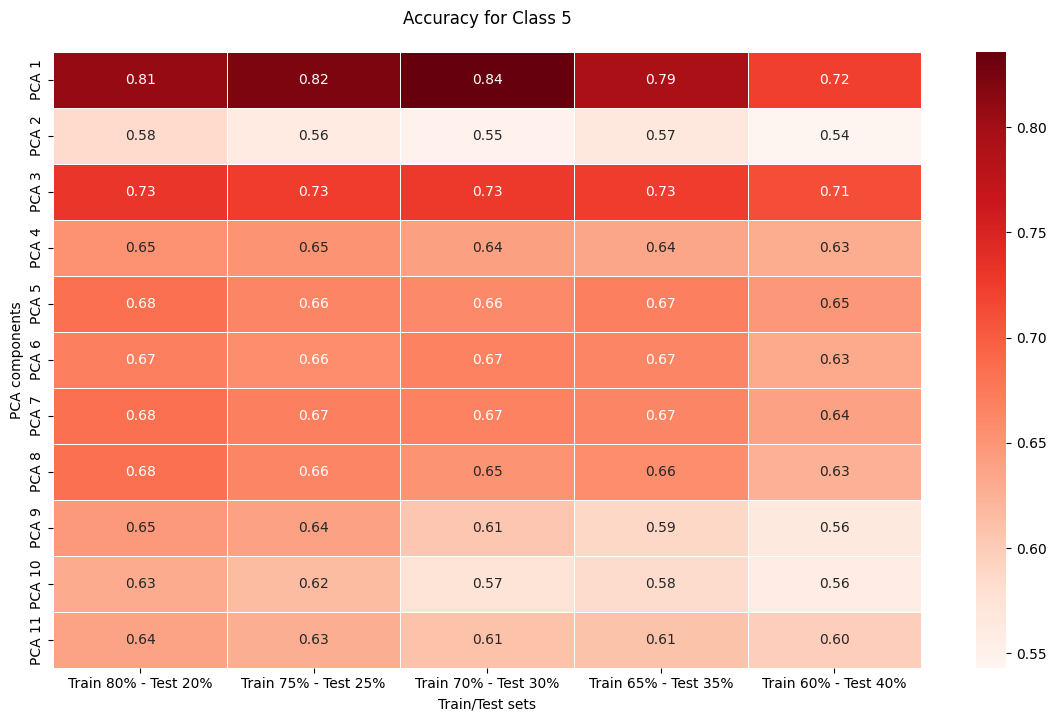

In [17]:
def accuracy_for_class(target_class):
    accuracy_dict = {f'PCA {n_components}': [] for n_components in range(1, max_pca_components + 1)}

    for train_size, test_size in splits:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 42)

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        for n_components in range(1, max_pca_components + 1):
            pca = PCA(n_components = n_components)
            X_train_pca = pca.fit_transform(X_train_scaled)
            X_test_pca = pca.transform(X_test_scaled)

            classifier.fit(X_train_pca, y_train)

            predictions = classifier.predict_label(X_test_pca)
            correct_predictions = np.sum((predictions == y_test) & (y_test == target_class))
            total_predictions = np.sum(y_test == target_class)

            accuracy = correct_predictions / total_predictions if total_predictions else 0
            accuracy_dict[f'PCA {n_components}'].append(accuracy)


    df_accuracy = pd.DataFrame(accuracy_dict, index = [f'Train {int(train * 100)}% - Test {int(test * 100)}%' for train, test in splits])

    plt.figure(figsize = (14, 8))
    sns.heatmap(df_accuracy.T, annot = True, fmt = ".2f", cmap = 'Reds', cbar = True, linewidths = .5)
    plt.title(f'Accuracy for Class {target_class}', pad = 20)
    plt.xlabel('Train/Test sets')
    plt.ylabel('PCA components')
    plt.show()


accuracy_for_class(5)


#Confusion Matrix

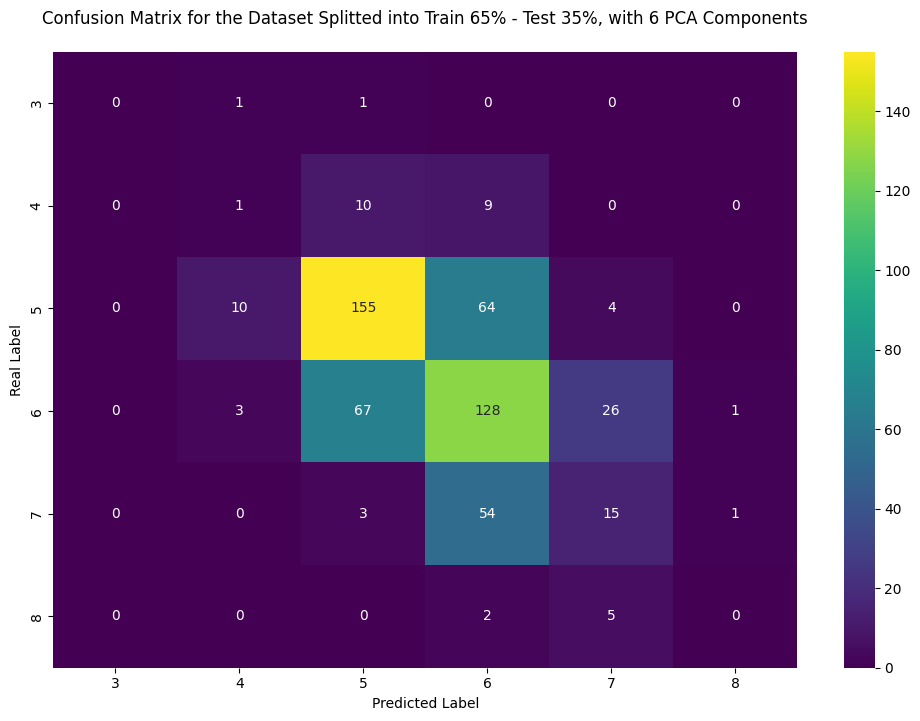

In [28]:
from sklearn.metrics import confusion_matrix

def show_confusion_matrix(test_size, n_components):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    classifier = BayesClassifier()
    classifier.fit(X_train_pca, y_train)

    y_pred = classifier.predict_label(X_test_pca)
    labels = [3, 4, 5, 6, 7, 8]
    conf_matrix = confusion_matrix(y_test, y_pred, labels = labels)

    plt.figure(figsize=(12, 8))
    sns.heatmap(conf_matrix, annot = True, fmt = 'g', cmap = 'viridis', xticklabels = labels, yticklabels = labels)
    plt.title(f'Confusion Matrix for the Dataset Splitted into Train {int(100 - 100 * test_size)}% - Test {int(100 * test_size)}%, with {n_components} PCA Components', pad = 20)
    plt.xlabel('Predicted Label')
    plt.ylabel('Real Label')
    plt.show()

show_confusion_matrix(0.35, 6)